In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [44]:
df=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [45]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [47]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [48]:
df.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


In [49]:
#Before cleaning
print("max date :" +df['date_time'].max())
print("min date :" +df['date_time'].min())

max date :2018-09-30 23:00:00
min date :2012-10-02 09:00:00


In [50]:
df.isnull().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [51]:
df.duplicated().sum()

17

# EDA

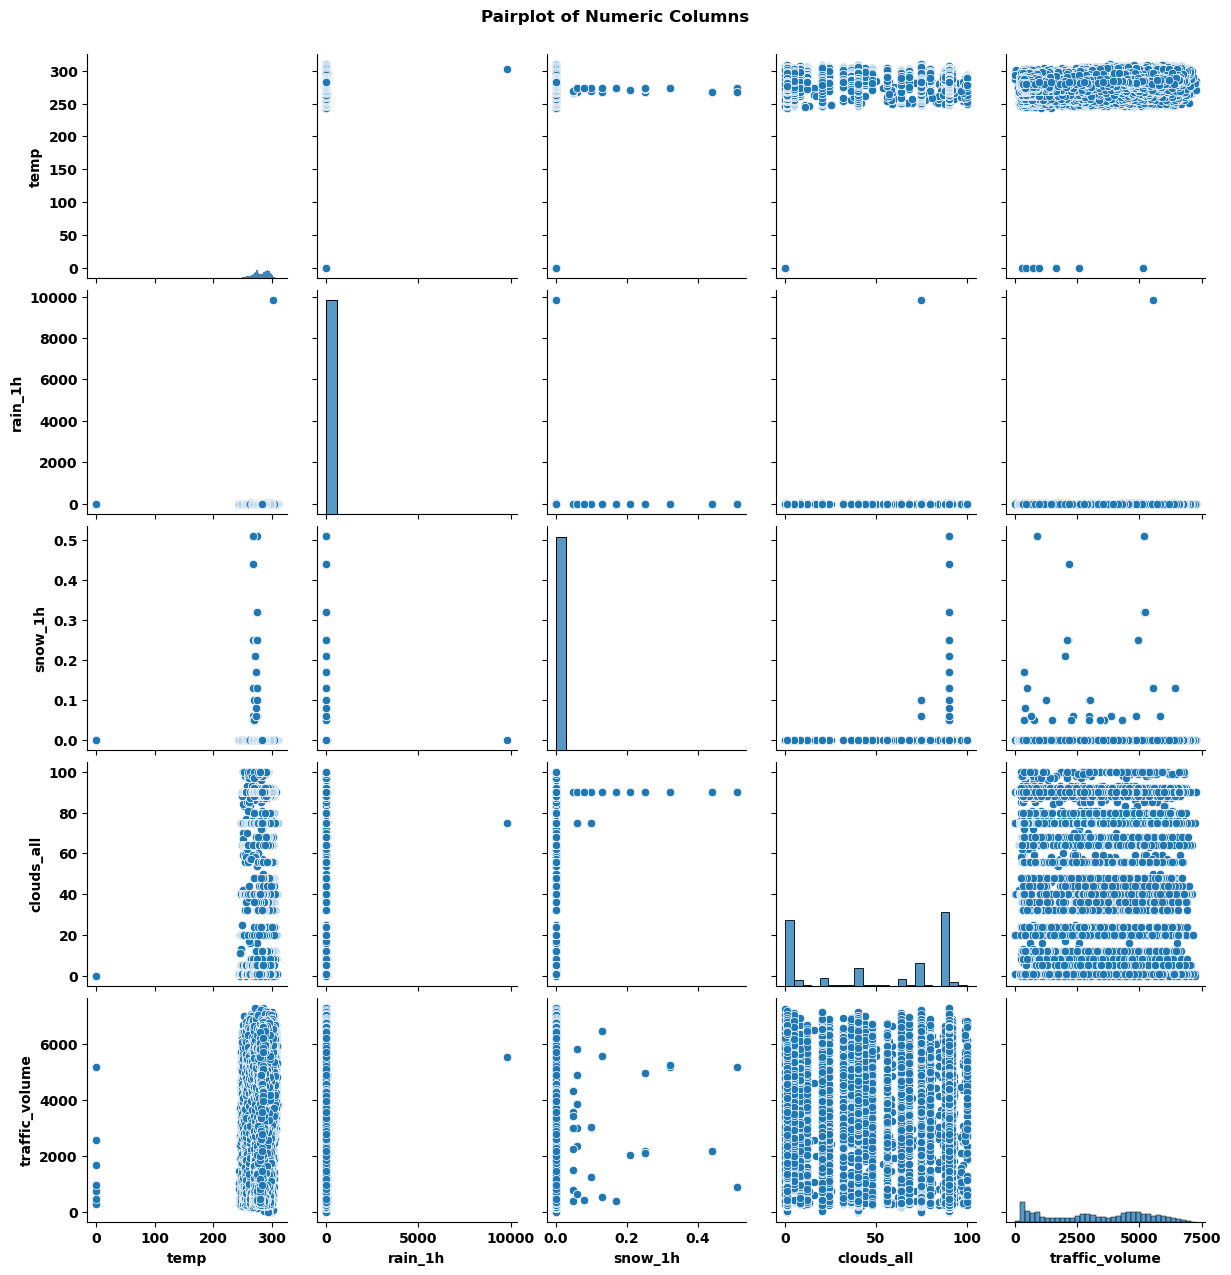

In [52]:
# Pairplot for numeric columns
sns.pairplot(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

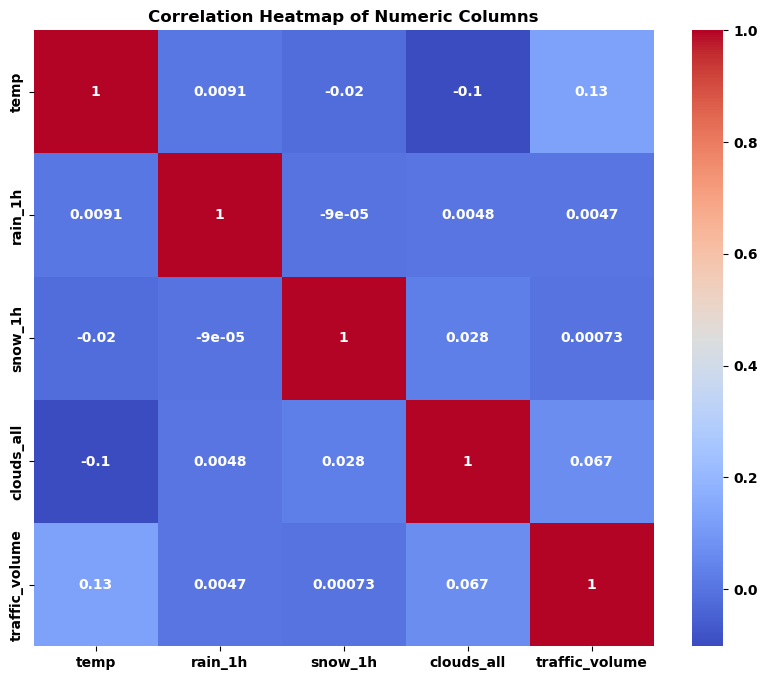

In [53]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

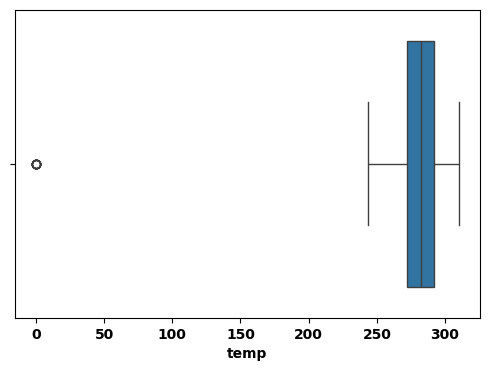

In [54]:
# boxplot for temp
plt.figure(figsize=(6,4))
sns.boxplot(df['temp'], orient='h')
plt.show()

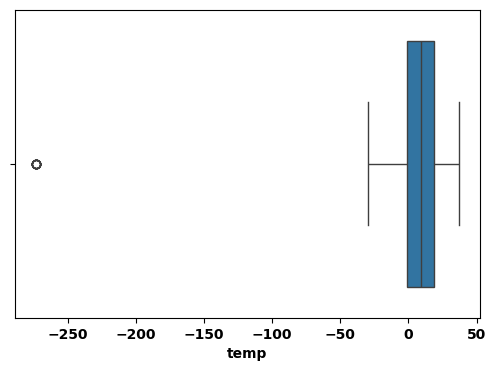

In [55]:
# Convert temperature data from Kelvin to Celsius
df['temp'] = (df['temp']  - 273.15)
plt.figure(figsize=(6,4))
sns.boxplot(df['temp'], orient='h')
plt.show()

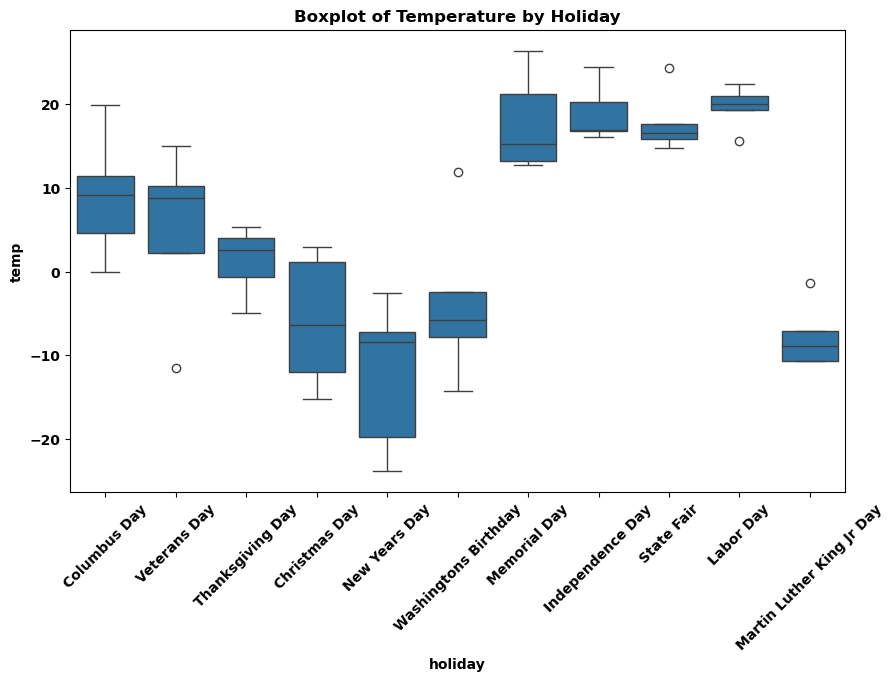

In [56]:
# Boxplot for 'temp' with 'holiday', to see if there is a difference in temperature on holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='temp', data=df)
plt.title('Boxplot of Temperature by Holiday')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19188\398608085.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['rain_1h'], shade=True)


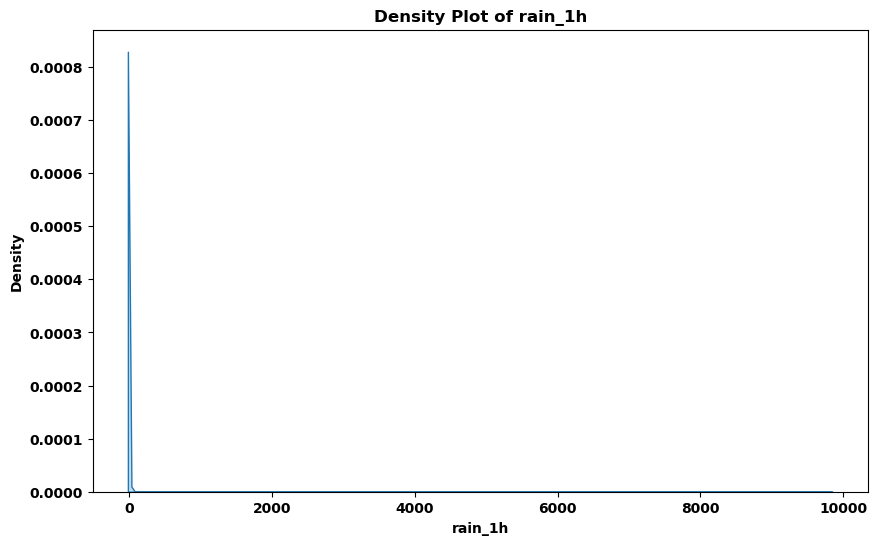

In [57]:
# Density plot of rain_1h column distribution , most of the values are 0
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['rain_1h'], shade=True)
plt.title('Density Plot of rain_1h')
plt.xlabel('rain_1h')
plt.ylabel('Density')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19188\1409290417.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['snow_1h'], shade=True)


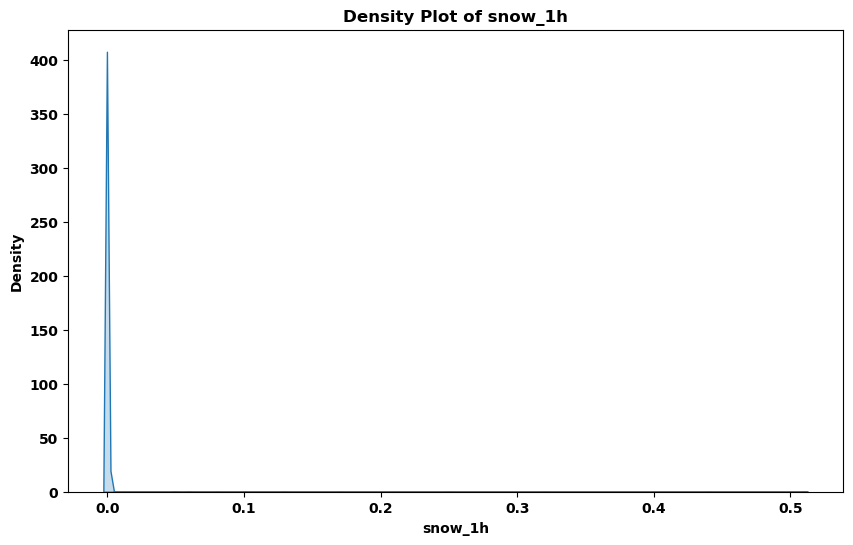

In [58]:
# Density plot, most of the values are 0
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['snow_1h'], shade=True)
plt.title('Density Plot of snow_1h')
plt.xlabel('snow_1h')
plt.ylabel('Density')
plt.show()

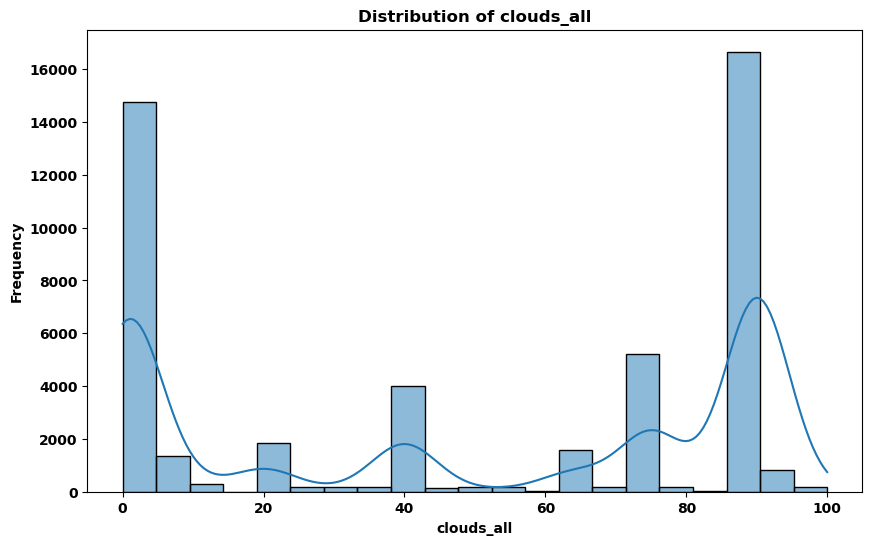

In [59]:
# plot rain_1h column distribution , most of the values are 0
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='clouds_all', kde=True)
plt.title('Distribution of clouds_all')
plt.xlabel('clouds_all')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19188\667536362.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= df.traffic_volume, shade= True)


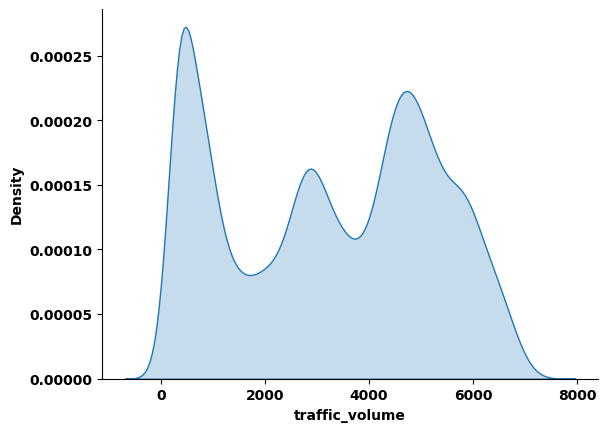

In [60]:
# Check Traffic volume distribution
sns.kdeplot(x= df.traffic_volume, shade= True)
sns.despine()

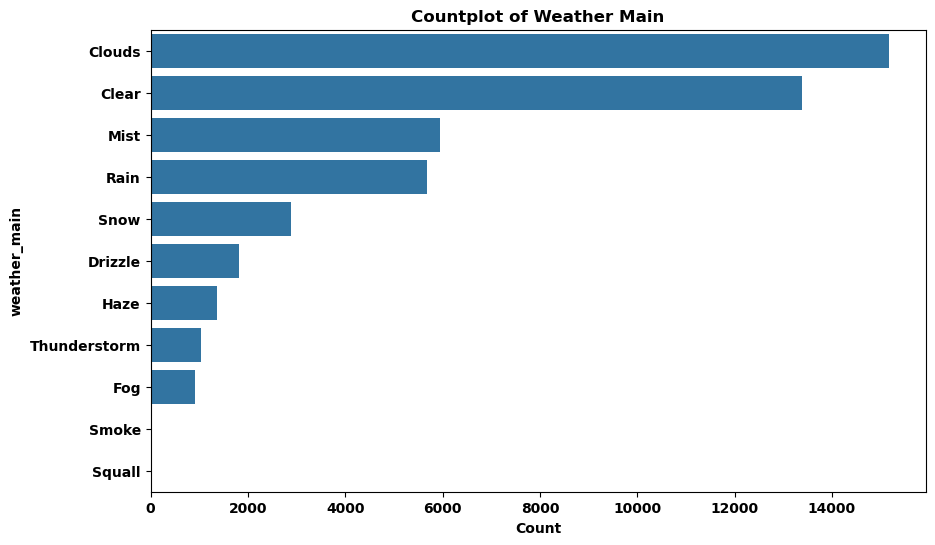

In [61]:
# Countplot for 'weather_main', most of the data is recorded on cloudy days, the least on thunderstorm days and foggy days
plt.figure(figsize=(10, 6))
sns.countplot(y='weather_main', data=df, order=df['weather_main'].value_counts().index)
plt.title('Countplot of Weather Main')
plt.xlabel('Count')
plt.show()

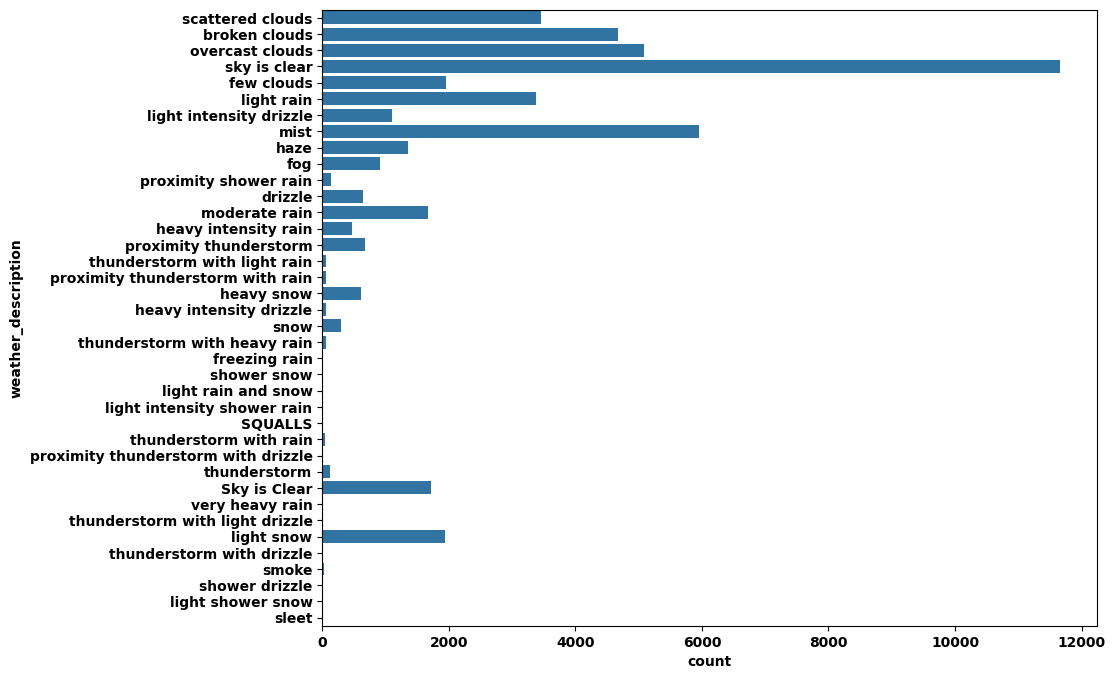

In [62]:
# detailed description of the main wheather, types of clouds, rain, etc.
plt.figure(figsize=(10,8))
sns.countplot(df['weather_description'])
plt.show()

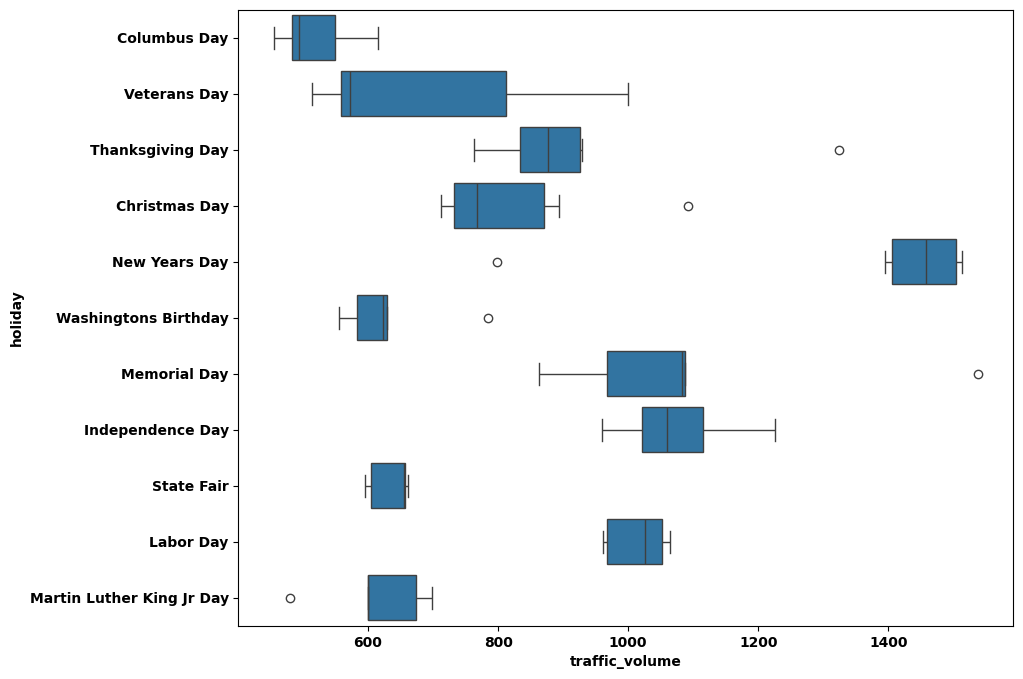

In [63]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = df)
plt.show()

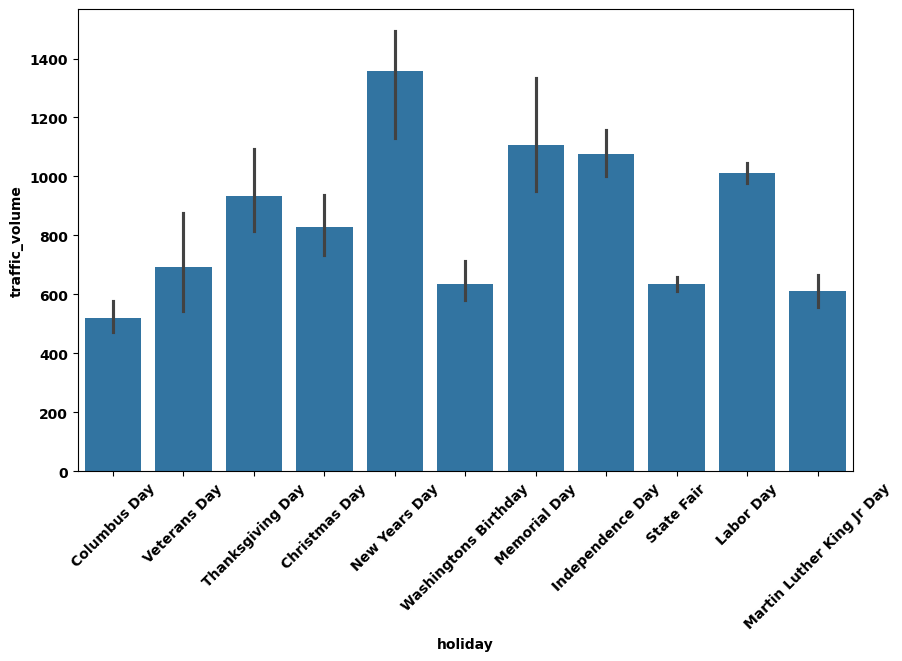

In [64]:
# another way to visualize traffic volume on holidays
plt.figure(figsize=(10,6))
sns.barplot(df, x='holiday', y='traffic_volume')
plt.xticks(rotation=45)
plt.show()

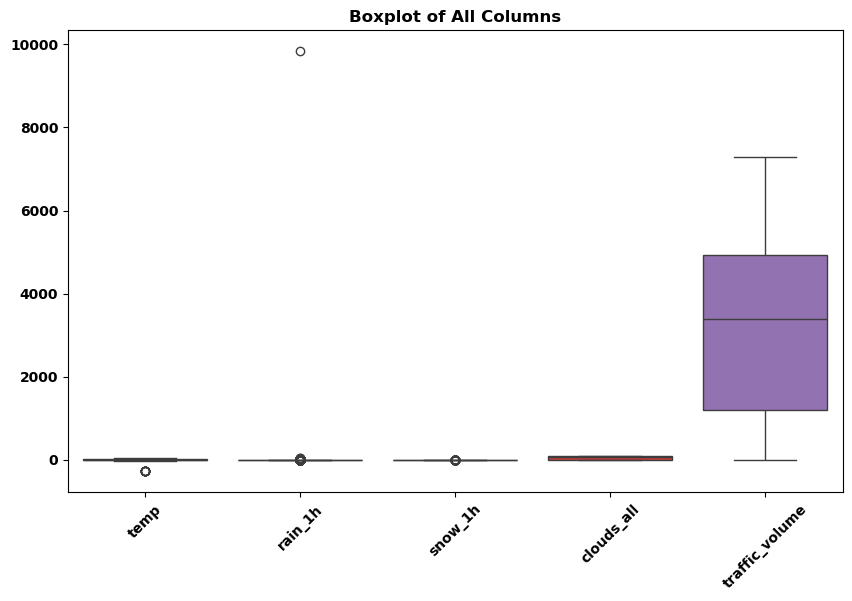

In [65]:
# detect outliers on whole dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of All Columns')
plt.show()

# Data pre-processing

In [68]:
#copying data to new data frame
df_cleaned = df.copy()

# Replace nan in holidays with Unknown

In [69]:
df_cleaned['holiday'].fillna('Unknown', inplace=True)

# Extract useful information fron the date

In [70]:
#Extracting features from date_time variable
df_cleaned['date_time'] = pd.to_datetime(df_cleaned['date_time'])
df_cleaned['weekday'] = df_cleaned['date_time'].dt.weekday
df_cleaned['date'] = df_cleaned['date_time'].dt.date
df_cleaned['hour'] = df_cleaned['date_time'].dt.hour
df_cleaned['year'] = df_cleaned['date_time'].dt.year

In [71]:
# Show statistics of traffic volume for each day
df_cleaned.groupby('weekday')['traffic_volume'].agg(['mean','count','min','max','sum']).sort_values(by= 'sum')

,mean,count,min,max,sum
weekday,,,,,
6,2368.588329,6872,3,6645,16276939
5,2773.638120,6831,0,6470,18946722
0,3309.387161,7072,123,7117,23403986
1,3488.555799,6846,125,7217,23882653
3,3637.899663,6817,1,7280,24799562
2,3583.196681,6930,1,7192,24831553
4,3656.358836,6836,10,7241,24994869


# Set date as index

In [72]:
df_cleaned=df_cleaned.set_index('date')

In [73]:
#drop old column
df_cleaned.drop('date_time', axis=1, inplace=True)

In [74]:
df_cleaned.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,year
date,,,,,,,,,,,
2012-10-02,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,1,9,2012
2012-10-02,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,4516,1,10,2012
2012-10-02,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,1,11,2012
2012-10-02,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,1,12,2012
2012-10-02,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,4918,1,13,2012


In [75]:
df_cleaned.drop_duplicates()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,year
date,,,,,,,,,,,
2012-10-02,Unknown,15.13,0.0,0.0,40,Clouds,scattered clouds,5545,1,9,2012
2012-10-02,Unknown,16.21,0.0,0.0,75,Clouds,broken clouds,4516,1,10,2012
2012-10-02,Unknown,16.43,0.0,0.0,90,Clouds,overcast clouds,4767,1,11,2012
2012-10-02,Unknown,16.98,0.0,0.0,90,Clouds,overcast clouds,5026,1,12,2012
2012-10-02,Unknown,17.99,0.0,0.0,75,Clouds,broken clouds,4918,1,13,2012
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,Unknown,10.30,0.0,0.0,75,Clouds,broken clouds,3543,6,19,2018
2018-09-30,Unknown,9.61,0.0,0.0,90,Clouds,overcast clouds,2781,6,20,2018
2018-09-30,Unknown,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,6,21,2018


In [76]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_cleaned['hour'] = df_cleaned.hour.map(hour_modify)

In [77]:
df_cleaned.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
weekday                  int32
hour                    object
year                     int32
dtype: object

In [78]:
encoder=LabelEncoder()

# Apply LabelEncoder to each categorical column
df_cleaned['holiday'] = encoder.fit_transform(df_cleaned['holiday'])
df_cleaned['weather_main'] = encoder.fit_transform(df_cleaned['weather_main'])
df_cleaned['weather_description'] = encoder.fit_transform(df_cleaned['weather_description'])
df_cleaned['hour'] = encoder.fit_transform(df_cleaned['hour'])


In [79]:
df_cleaned

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,hour,year
date,,,,,,,,,,,
2012-10-02,9,15.13,0.0,0.0,40,1,24,5545,1,4,2012
2012-10-02,9,16.21,0.0,0.0,75,1,2,4516,1,4,2012
2012-10-02,9,16.43,0.0,0.0,90,1,19,4767,1,4,2012
2012-10-02,9,16.98,0.0,0.0,90,1,19,5026,1,0,2012
2012-10-02,9,17.99,0.0,0.0,75,1,2,4918,1,0,2012
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,9,10.30,0.0,0.0,75,1,2,3543,6,2,2018
2018-09-30,9,9.61,0.0,0.0,90,1,19,2781,6,5,2018
2018-09-30,9,9.58,0.0,0.0,90,10,21,2159,6,5,2018


In [82]:
# remove outliers from whole dataframe
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

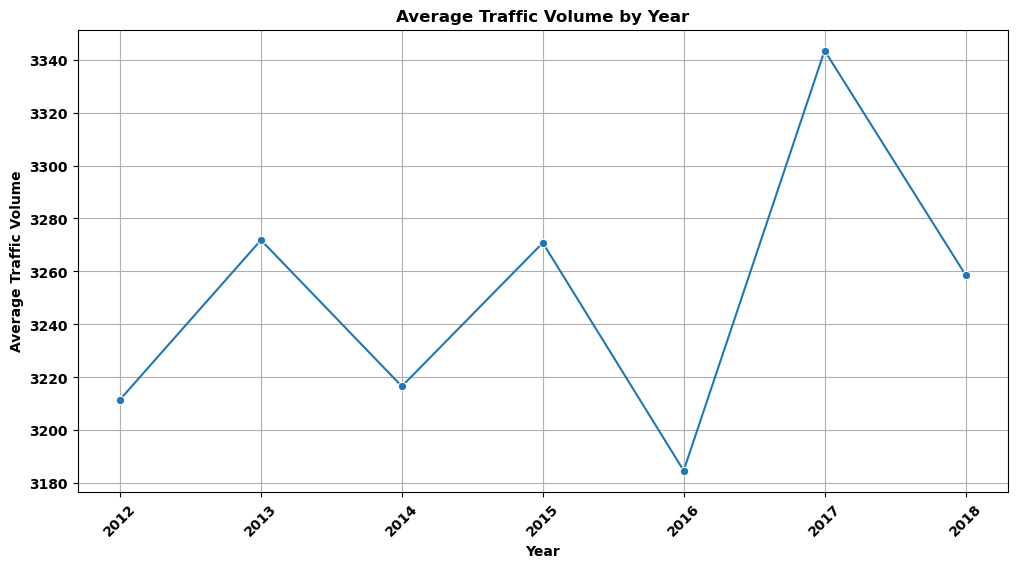

In [83]:

# Group by year and calculate the average traffic volume for each year
average_traffic_by_year = df_cleaned.groupby('year')['traffic_volume'].mean().reset_index()

# Line plot for average traffic volume by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='traffic_volume', data=average_traffic_by_year, marker='o')
plt.title('Average Traffic Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [84]:
df_cleaned.to_csv('df_cleaned.csv')